# **Proyek Akhir : Klasifikasi Gambar**

* Nama : Firman Nurcahyo
* Email : firman.cahyo.369@gmail.com
* ID DIcoding : Firman Nurcahyo

**Berikut kriteria submission yang harus Anda penuhi :**
* Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.
* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* Program dikerjakan pada Google Colaboratory.
* Akurasi dari model minimal 85%.

#  **Mengimport Modul Yang Diperlukan**

### **1. Import/Setup Library dan Split Data**

In [1]:
# Install necessary packages
%pip install tensorflow
%pip install split_folders
%matplotlib inline

# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

import tkinter as tk
from tkinter import filedialog

import numpy as np
from keras.preprocessing import image

import zipfile, os
import splitfolders

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display TensorFlow version
print("TensorFlow version:", tf.__version__)


Note: you may need to restart the kernel to use updated packages.

TensorFlow version: 2.15.0


In [2]:
# Extract the dataset from the zip file
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

# Split the dataset into train and validation sets
splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', output="rps/rockpaperscissors/data", seed=1337, ratio=(.6, .4))
# Alternatively, you can use the fixed method:
# splitfolders.fixed('rps/rockpaperscissors/rps-cv-images', output="rps/rockpaperscissors/data", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None)

# Set up directory paths
data_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

# Display the list of files in the training and validation directories
print("Files in the training directory:")
print(os.listdir(train_dir))

print("\nFiles in the validation directory:")
print(os.listdir(validation_dir))

Copying files: 2188 files [00:10, 210.94 files/s]

Files in the training directory:
['paper', 'rock', 'scissors']

Files in the validation directory:
['paper', 'rock', 'scissors']


In [3]:
# Display the number of files in each category
paper_count = len(os.listdir('rps/rockpaperscissors/paper'))
scissors_count = len(os.listdir('rps/rockpaperscissors/scissors'))
rock_count = len(os.listdir('rps/rockpaperscissors/rock'))

# Print the counts
print("Number of paper images:", paper_count)
print("Number of scissors images:", scissors_count)
print("Number of rock images:", rock_count)

Number of paper images: 712
Number of scissors images: 750
Number of rock images: 726


In [4]:
# Set up directory paths for training and validation sets
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [5]:
# Get the list of image filenames for each category in the training set
paper_imgs = os.listdir(train_paper_dir)
scissors_imgs = os.listdir(train_scissors_dir)
rock_imgs = os.listdir(train_rock_dir)

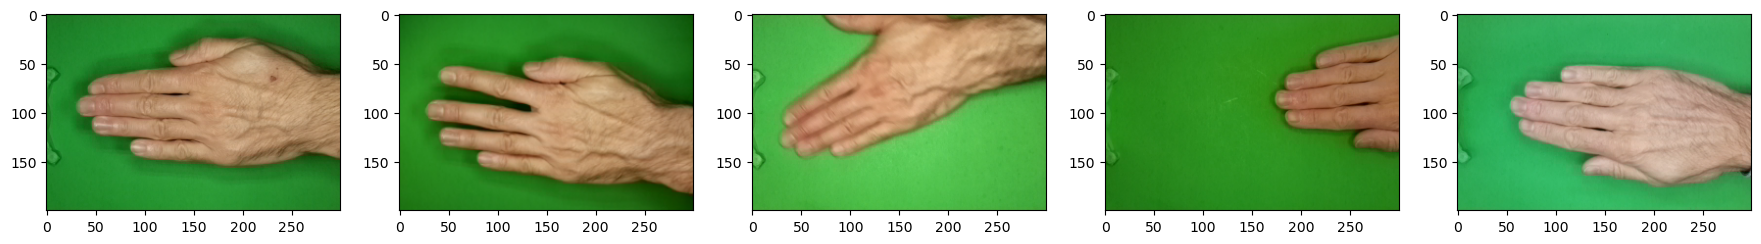

In [6]:
# Set up the plot for displaying the first 5 paper images
plt.figure(figsize=(22, 5))

# Iterate over the first 5 images in the paper category
for i, img_path in enumerate(paper_imgs[:5]):
    # Create a subplot
    sp = plt.subplot(1, 5, i + 1)
    
    # Read and display the image
    img = mpimg.imread(os.path.join(train_paper_dir, img_path))
    plt.imshow(img)

# Show the plot
plt.show()

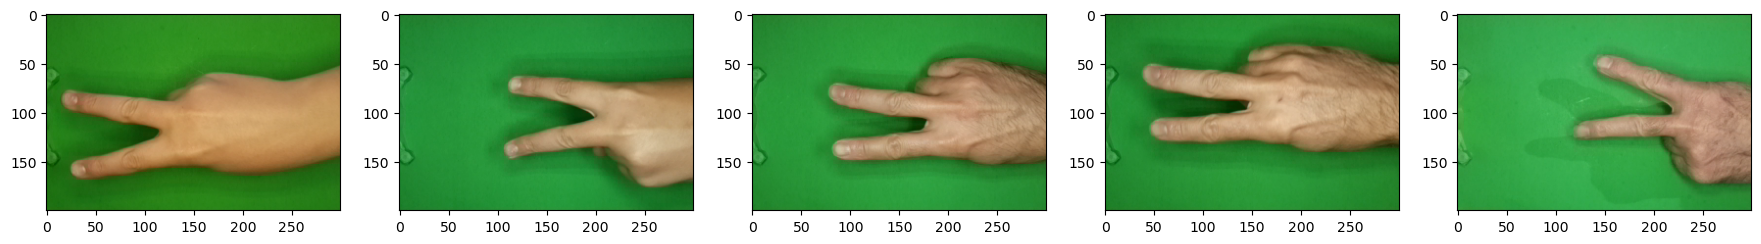

In [7]:
# Set up the plot for displaying the first 5 scissors images
plt.figure(figsize=(22, 5))

# Iterate over the first 5 images in the scissors category
for i, img_path in enumerate(scissors_imgs[:5]):
    # Create a subplot
    sp = plt.subplot(1, 5, i + 1)
    
    # Read and display the image
    img = mpimg.imread(os.path.join(train_scissors_dir, img_path))
    plt.imshow(img)

# Show the plot
plt.show()

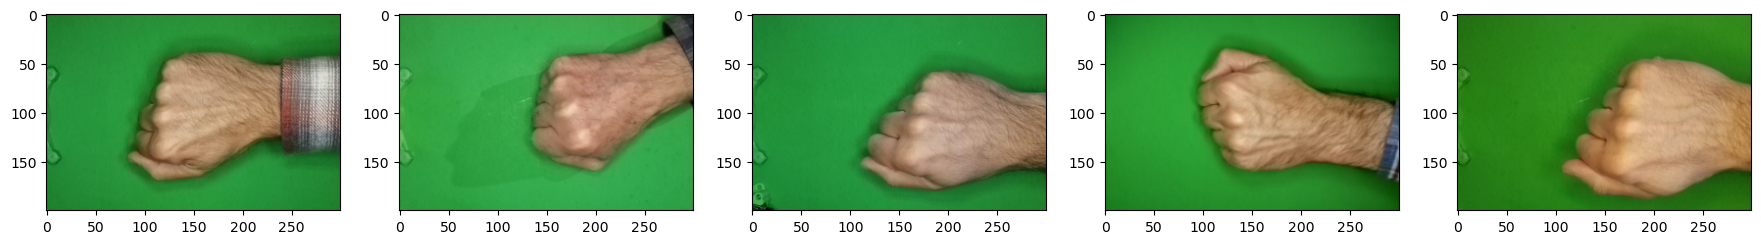

In [8]:
# Set up the plot for displaying the first 5 rock images
plt.figure(figsize=(22, 5))

# Iterate over the first 5 images in the rock category
for i, img_path in enumerate(rock_imgs[:5]):
    # Create a subplot
    sp = plt.subplot(1, 5, i + 1)
    
    # Read and display the image
    img = mpimg.imread(os.path.join(train_rock_dir, img_path))
    plt.imshow(img)

# Show the plot
plt.show()

### **2. Augmentasi Data Gambar**

In [9]:
# Image data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.9999
)

In [10]:
# Generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

# Generator untuk data validasi
valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
# Gets the class index of the training generator
class_indices_train = train_generator.class_indices

# Displays the class index
print(class_indices_train)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [12]:
# Gets the class index of the training generator
class_indices_train = train_generator.class_indices

# Displays the class index
print(class_indices_train)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [13]:
# Define the sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)       

### **3. Kompilasi Model dan Alur Pelatihan**

In [14]:
# Compile the model using the RMSprop optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [15]:
# Train the model
historyku = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20


25/25 - 9s - loss: 1.2681 - accuracy: 0.3438 - val_loss: 1.0967 - val_accuracy: 0.3250 - 9s/epoch - 374ms/step
Epoch 2/20
25/25 - 5s - loss: 1.0921 - accuracy: 0.3575 - val_loss: 1.0807 - val_accuracy: 0.4437 - 5s/epoch - 206ms/step
Epoch 3/20
25/25 - 4s - loss: 0.9930 - accuracy: 0.5238 - val_loss: 0.9610 - val_accuracy: 0.5250 - 4s/epoch - 173ms/step
Epoch 4/20
25/25 - 4s - loss: 0.6812 - accuracy: 0.7237 - val_loss: 0.6446 - val_accuracy: 0.8313 - 4s/epoch - 157ms/step
Epoch 5/20
25/25 - 4s - loss: 0.4293 - accuracy: 0.8562 - val_loss: 0.5244 - val_accuracy: 0.7812 - 4s/epoch - 152ms/step
Epoch 6/20
25/25 - 4s - loss: 0.3752 - accuracy: 0.8662 - val_loss: 0.2190 - val_accuracy: 0.9563 - 4s/epoch - 148ms/step
Epoch 7/20
25/25 - 4s - loss: 0.2618 - accuracy: 0.9075 - val_loss: 0.5956 - val_accuracy: 0.6625 - 4s/epoch - 156ms/step
Epoch 8/20
25/25 - 4s - loss: 0.2702 - accuracy: 0.8963 - val_loss: 0.2049 - val_accuracy: 0.9250 - 4s/epoch - 147ms/step
Epoch 9/20
25/25 - 4s 

### **4. Plot Kurva Data Latih dan Validasi**

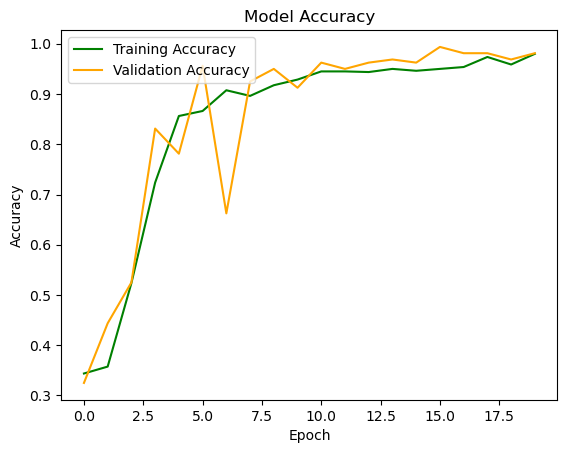

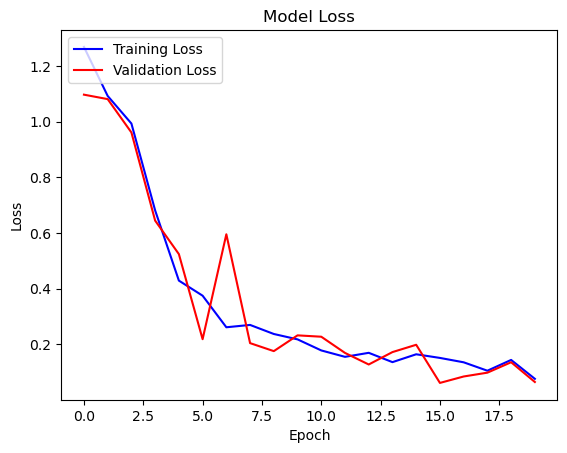

In [16]:
# Extract training history data
acc = historyku.history['accuracy']
val_acc = historyku.history['val_accuracy']
loss = historyku.history['loss']
val_loss = historyku.history['val_loss']

# Plot the model accuracy
plt.plot(acc, color='green', label='Training Accuracy')
plt.plot(val_acc, color='orange', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot the model loss
plt.plot(loss, color='blue', label='Training Loss')
plt.plot(val_loss, color='red', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

### **5. Prediksi Model Data dengan Uploud Gambar**

1/1 [==============================] - 0s 23ms/step
C:/Data Firman/Gunadarma Informatika/Data Mahasiswa/Sertifikat/Dicoding/Belajar Machine Learning untuk Pemula/Img.jpeg
Paper


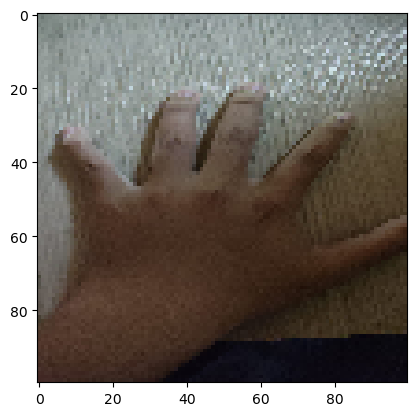

In [20]:
# Create a Tkinter root window (this won't be shown)
root = tk.Tk()
root.withdraw()

# Open a file dialog for file selection
file_path = filedialog.askopenfilename()

# Load and process the selected image
if file_path:
    img = tf.keras.utils.load_img(file_path, target_size=(100, 100))
    imgplot = plt.imshow(img)
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print(file_path)
    if classes[0, 0] == 1.0:
        print('Paper')
    elif classes[0, 1] == 1.0:
        print('Rock')
    else:
        print('Scissors')
else:
    print('No file selected.')